In [1]:
%matplotlib inline

import math
from typing import Sequence, Tuple, Dict
# import random

import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

In [2]:
class JackRentalEnv:
    """Manage Jack’s Car Rental environment"""
    def __init__(self, dim: int = 20):
        """"""
        self.dim = dim
        self.num_states = dim * dim
        self.actions = list(range(1, 6)) + list(range(-5, 1))
        self.current_state = {"loc_1": 10, "loc_2": 10}
        self.transition_prob = {
            "loc_1": self.compute_prob(lambda_request=3, lambda_return=3),
            "loc_2": self.compute_prob(lambda_request=4, lambda_return=2)
        }
        
        # sanity checks
        assert 1-sum(self.transition_prob['loc_1'].values()) < 1e-6, "Probability should add up to one"
        assert 1-sum(self.transition_prob['loc_2'].values()) < 1e-6, "Probability should add up to one"
        
    def transition(self, action: int, state: Tuple[int, int]) -> Tuple:
        """"""
        # add returns and requests at day
#         for location in self.transition_prob:
        # location 1
        for (car_in, car_out), prob in self.transition_prob['loc_1']:
            new_state = state + car_in - car_out
            if new_state >= 0:
                car_rent = car_out
            else:
                car_rent = max(car_out + new_state, 0)
            assert car_rent >= 0
            new_state = max(new_state, 0)
            new_state = min(new_state, self.dim)
            reward = 10 * car_rent
            storage.append((new_state, prob, reward))
            
        # TODO HERE
        # move cars at night
        if action >= 0:
            move_cars = max(0, self.current_state['pos_1']-action)
            self.current_state['pos_1'] -= move_cars
            self.current_state['pos_2'] += move_cars
            self.current_state['pos_2'] = min(self.current_state['pos_2'], self.dim)
        else:
            move_cars = max(0, self.current_state['pos_2']+action)
            
        
        self.current_state['pos_1'] -= action
        self.current_state['pos_2'] += action
        reward = -2 * abs(action)
            
        return reward, self.current_state['pos_1'], self.current_state['pos_2']
        
#     def show_full_space(self):
#         """Show all possible action/state combinations and their rewards"""
#         for i in range(self.dim):
#             for k in range(self.dim):
#                 for action_name, action in self.possible_actions.items():
#                     reward, next_pos = self.step(current_position=(i, k), action_name=action_name)
#                     print(f"from {(i, k)} move {action_name} --> into {next_pos} with R={reward}")
                    
#     def step(self, current_position: Tuple[int, int], action_name: str):
#         """Get reward and next position/state"""
#         assert action_name in self.possible_actions, f"Action {action_name} not among possible actions"
        
#         action_x, action_y = self.possible_actions[action_name]
#         i, k = current_position
#         next_pos = i+action_x, k+action_y
#         if (i, k) in self.special_moves:  # special move get fixed reward and always move to one location
#             next_pos = self.special_moves[(i, k)]
#             reward = self.special_reward[(i, k)]
#         elif next_pos[0] < 0 or next_pos[0] > self.dim-1 or next_pos[1] < 0 or next_pos[1] > self.dim-1:
#             next_pos = i, k
#             reward = -1
#         else:
#             reward = 0
        
#         return reward, next_pos
    
    def grid_to_vec(self, row: int, col: int) -> int:
        """get index of vector which corresponds to a grid position"""
        assert 0 <= row < self.dim, f"Invalid row number {row}, max is {self.dim - 1}"
        assert 0 <= col < self.dim, f"Invalid column number {col}, max is {self.dim - 1}"
        
        return row * self.dim + col

    def vec_to_grid(self, idx: int) -> Tuple[int, int]:
        """get grid position which corresponds to index of vector"""
        assert 0 <= idx < self.dim * self.dim, f"Invalid index {idx}, max is {self.dim * self.dim - 1}"
        
        return idx // self.dim, idx % self.dim
    
    def dict_to_grid(self, fun_on_grid: dict):
        ans = []
        for row in range(self.dim):
            ans.append({f"col_{col}": fun_on_grid[(row, col)] for col in range(self.dim)})

        return pd.DataFrame(ans)
    
    def poisson(self, n: int, exp_value: float):
        """"""
        return exp_value ** n / math.factorial(n) * math.exp(-exp_value)
    
    def compute_prob(self, lambda_request: float, lambda_return: float, max_comb: int = 20):
        """"""
        change = {}
        for i in range(max_comb):
            for k in range(max_comb):
                change[(i, k)] = self.poisson(i, lambda_return) * self.poisson(k, lambda_request)
#                 if i-k not in change:
#                     change[i-k] = self.poisson(i, lambda_return) * self.poisson(k, lambda_request)
#                 else:
#                     change[i-k] += self.poisson(i, lambda_return) * self.poisson(k, lambda_request)
                    
        return change

In [5]:
jack_rental = JackRentalEnv()

Text(0.5, 1.0, 'Location 1')

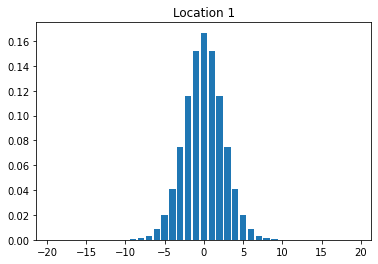

In [6]:
plot_loc = {}
for (x, y), value in jack_rental.transition_prob['loc_1'].items():
    if x-y in plot_loc:
        plot_loc[x-y] += value
    else:
        plot_loc[x-y] = value

plt.bar(plot_loc.keys(), plot_loc.values())
plt.title('Location 1')

Text(0.5, 1.0, 'Location 2')

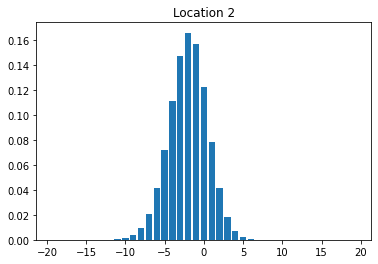

In [7]:
plot_loc = {}
for (x, y), value in jack_rental.transition_prob['loc_2'].items():
    if x-y in plot_loc:
        plot_loc[x-y] += value
    else:
        plot_loc[x-y] = value

plt.bar(plot_loc.keys(), plot_loc.values())
plt.title('Location 2')